# Pandas 시각화 (1) - Boxplot, Histogram

DataFrame은 내부적으로 `pyplot` 객체를 초기화고 있기 때문에 이를 활용하여 그래프를 직접 표시할 수 있다.

## #01. 준비작업

### [1] 패키지 참조

In [2]:
import sys
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.unicode_minus"] = False

## #02. Box Plot

### [1] 데이터 가져오기

#### (1) 데이터프레임 생성

In [4]:
df2 = read_excel("https://data.hossam.kr/pydata/grade.xlsx", index_col="이름")
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
영호,4,남자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,1,남자,91,90,89,80


#### (2) 데이터 전처리

명목형 변수를 category 타입으로 변경한다.

In [5]:
df2['학년'] = df2['학년'].astype('category')
df2['성별'] = df2['성별'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 철수 to 석영
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   학년      9 non-null      category
 1   성별      9 non-null      category
 2   국어      9 non-null      int64   
 3   영어      9 non-null      int64   
 4   수학      9 non-null      int64   
 5   과학      9 non-null      int64   
dtypes: category(2), int64(4)
memory usage: 706.0+ bytes


### [2] 단일 변수에 대한 상자 그림

DataFrame 객체의 `boxplot()` 메서드를 사용한다. 

표시하고자 하는 변수의 이름을 파라미터로 전달한다.

`pyplot` 객체의 `grid()` 메서드를 사용할 경우 `boxplot()` 메서드보다 먼저 호출해야 적용되므로 주의가 필요하다.

`boxplot()` 메서드에 `vert=0` 파라미터를 설정할 경우 상자그림이 가로로 표시된다.

`boxplot()` 메서드에 `sym` 파라미터를 설정할 경우 이상치의 마커 모양과 색상을 설정할 수 있다. (pyplot의 `boxplot()` 메서드와 동일)

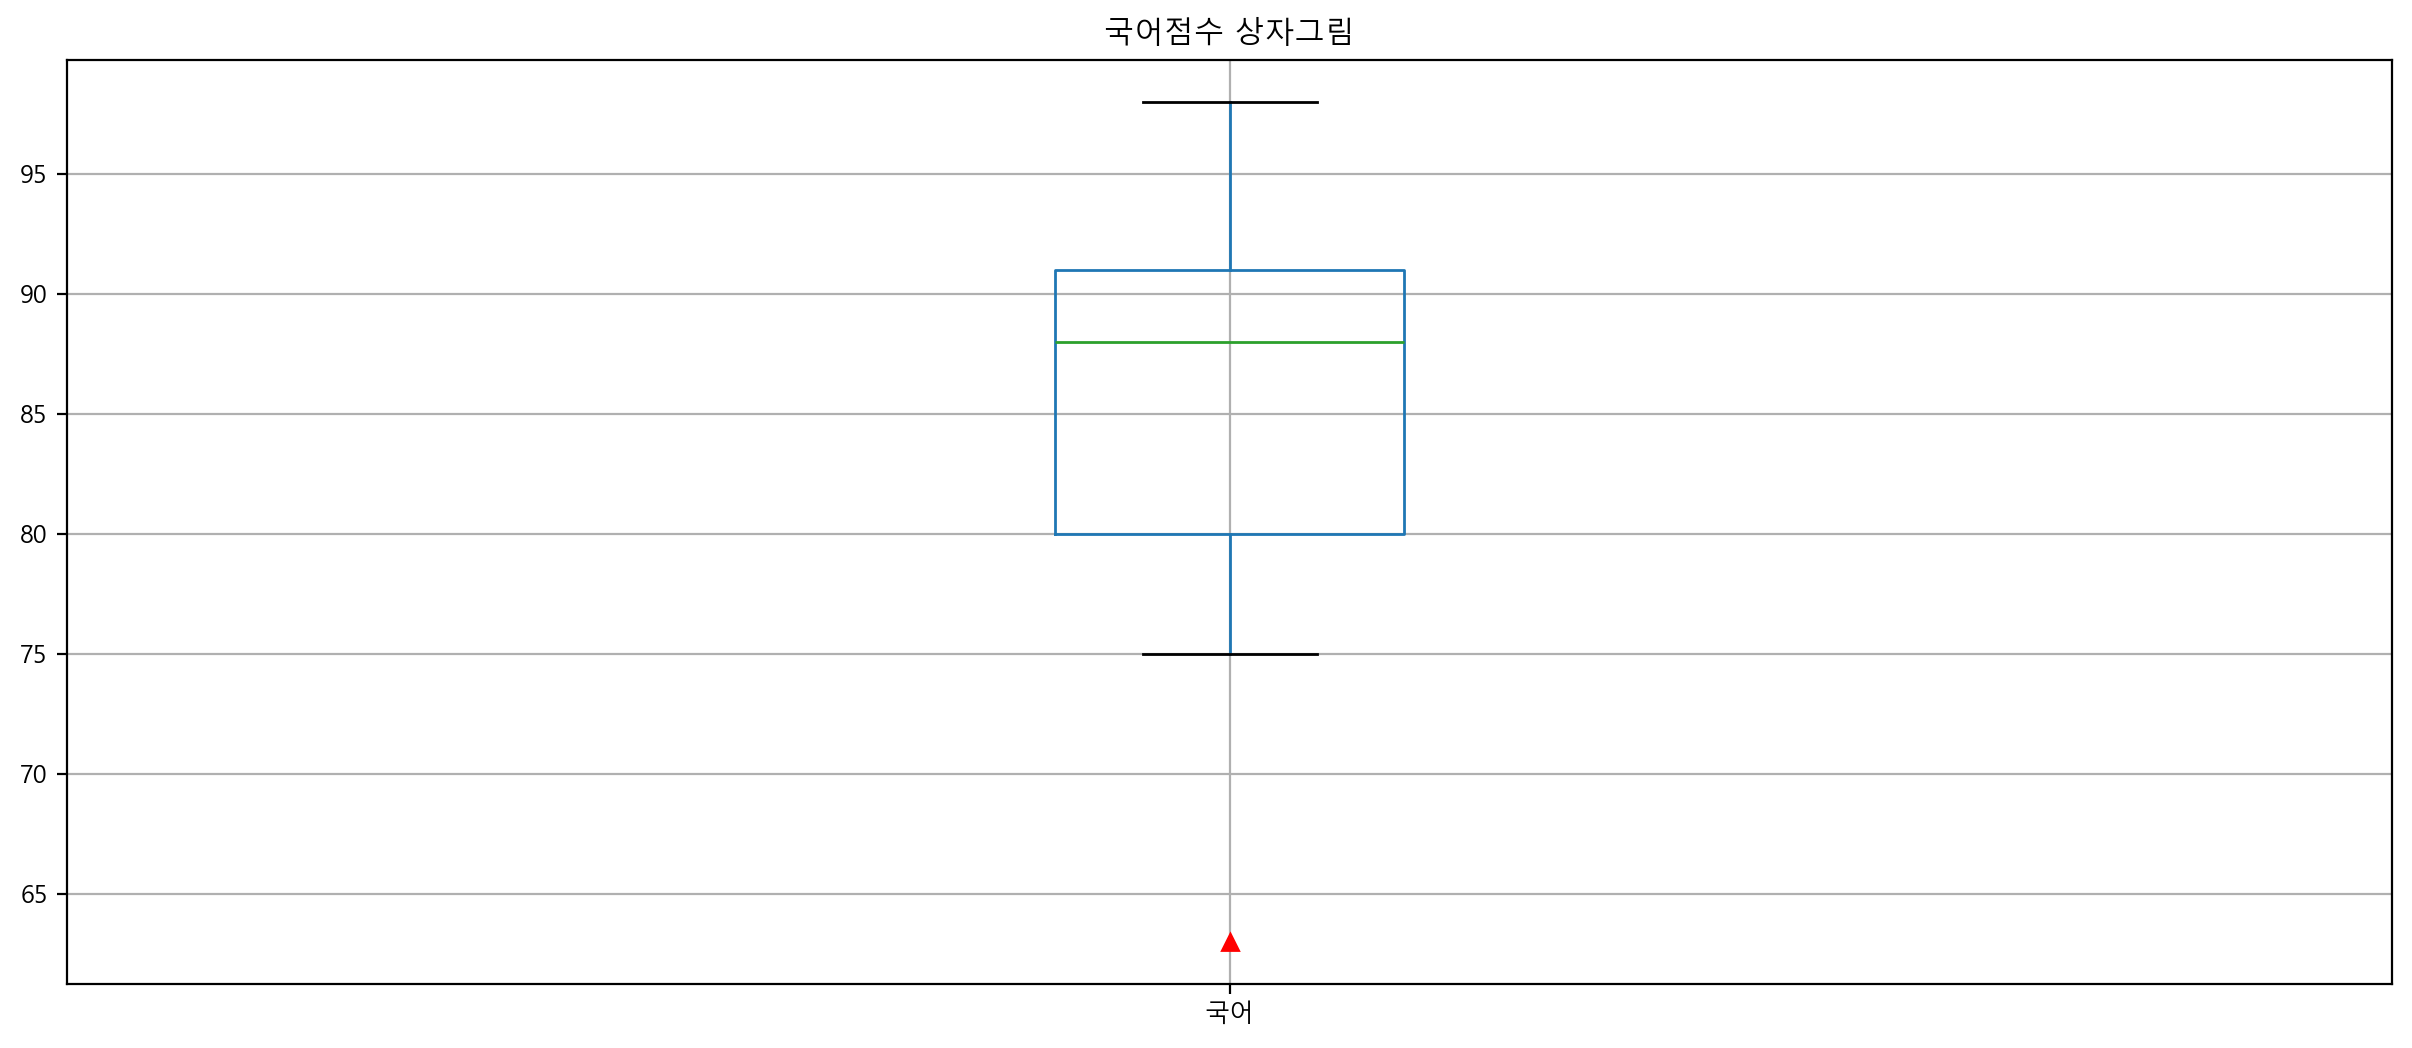

In [6]:
plt.grid()
df2.boxplot('국어', sym='r^')
plt.title("국어점수 상자그림")
plt.show()
plt.close()

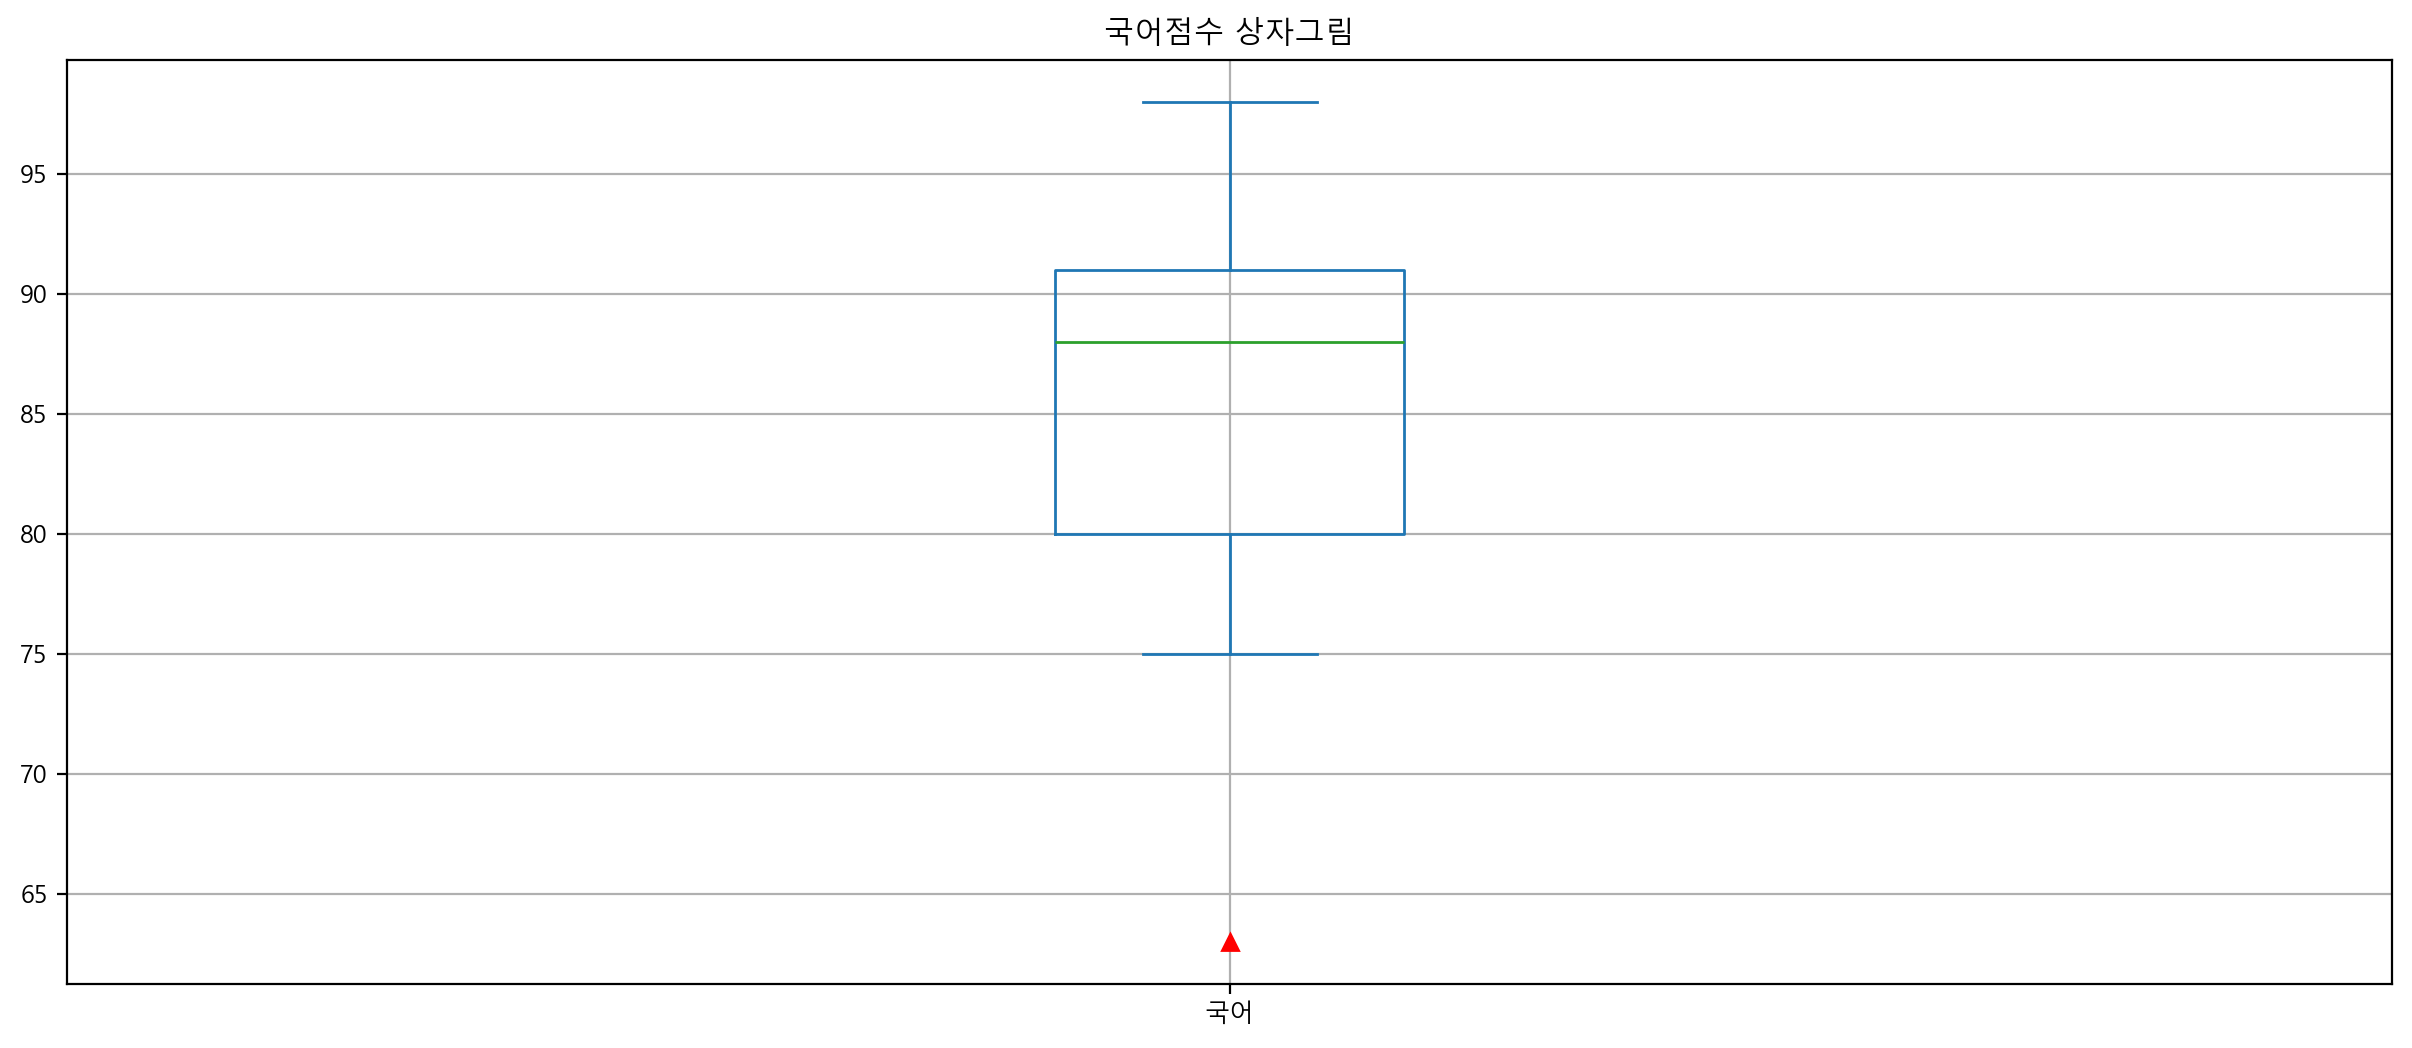

In [7]:
df2['국어'].plot(kind='box', sym= 'r^')
plt.grid()
plt.title("국어점수 상자그림")
plt.show()
plt.close()

### [3] 복수 변수에 대한 상자 그림

`boxplot()` 메서드에 시각화 하려는 변수의 이름을 리스트로 전달한다.

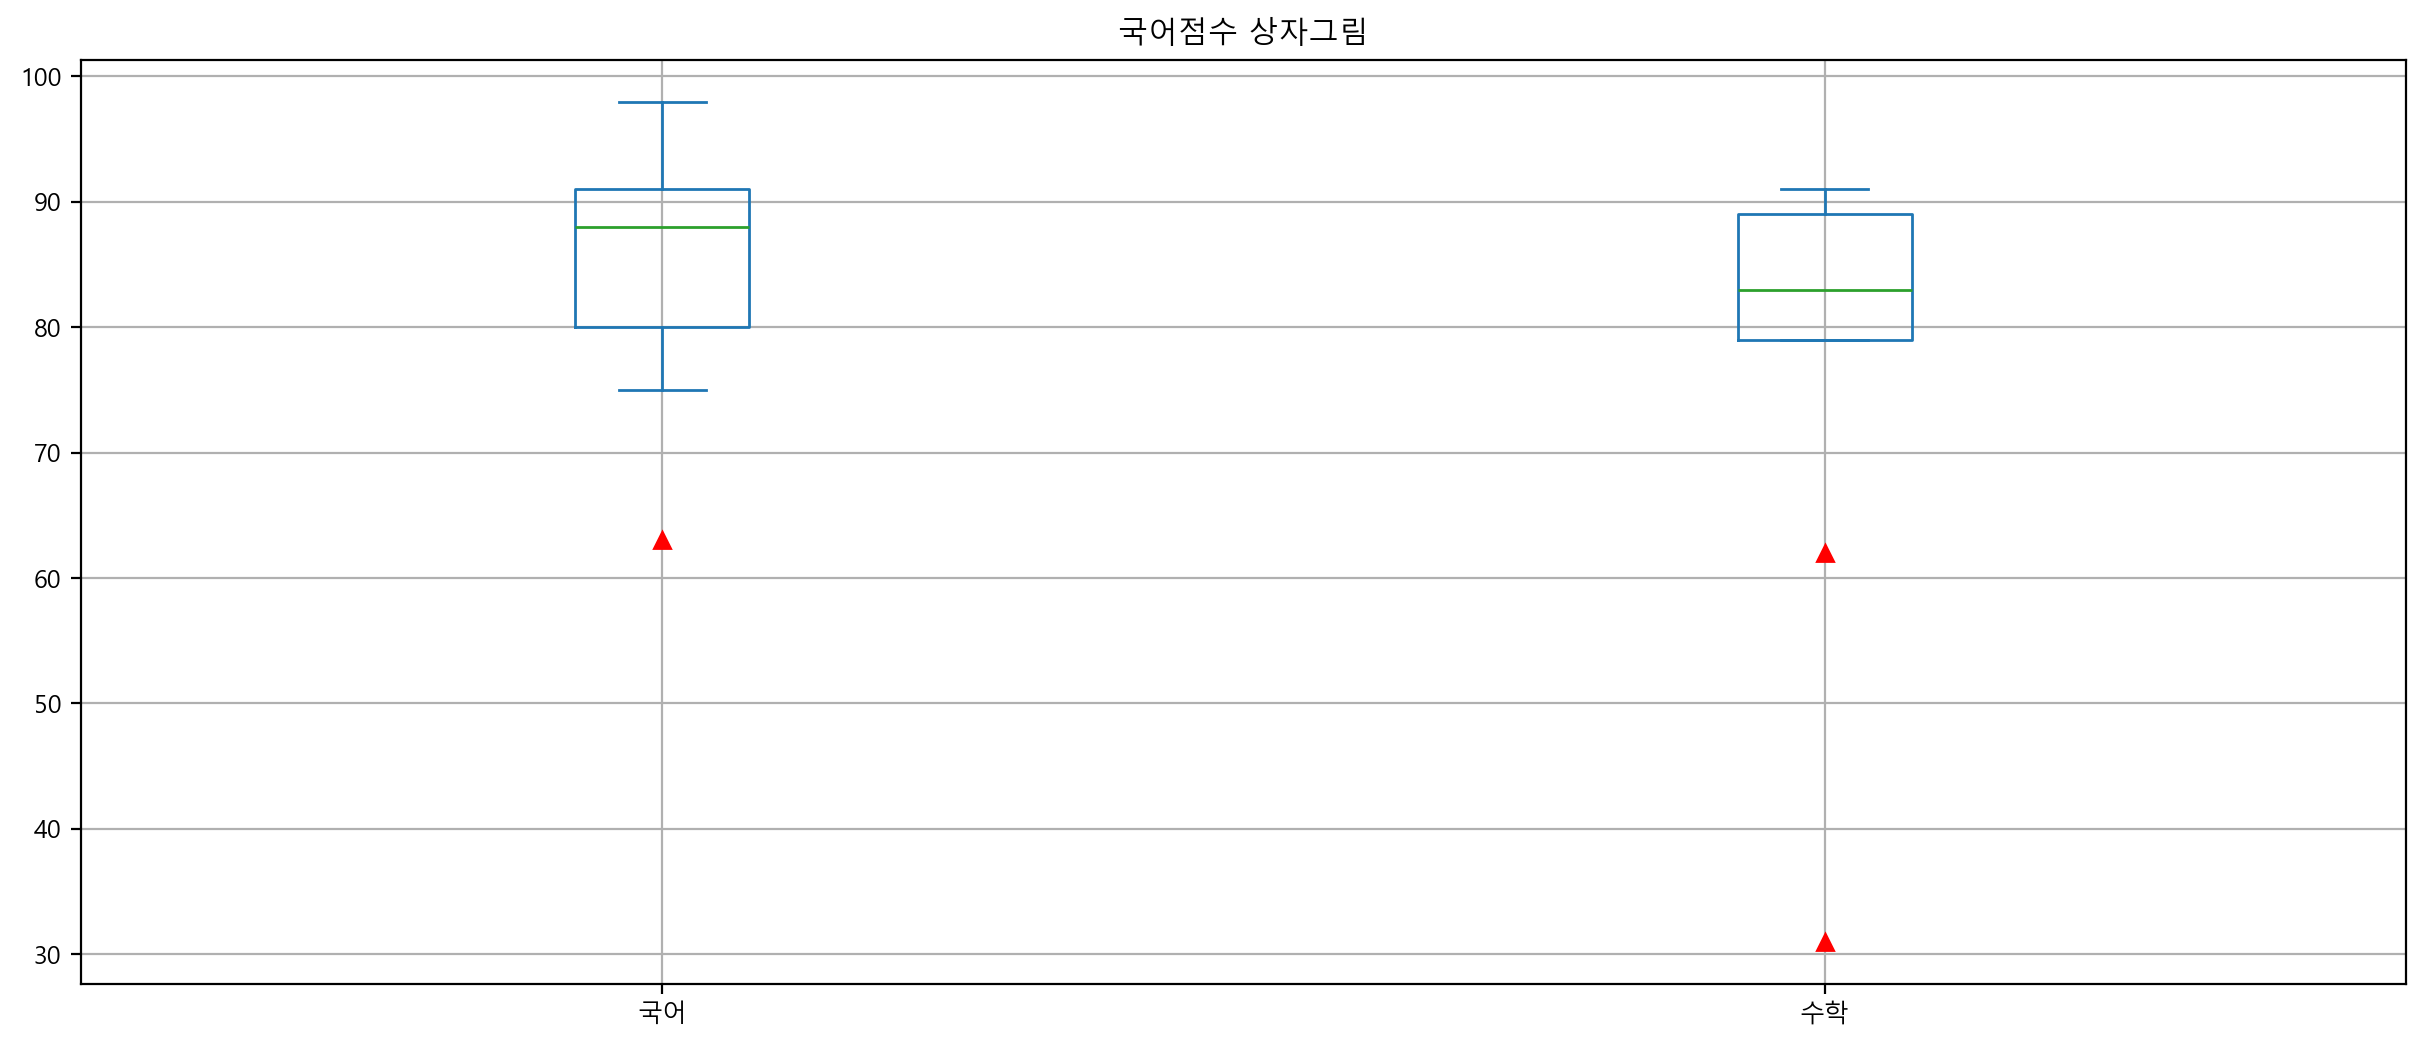

In [8]:
df2[['국어', '수학']].plot(kind = 'box', sym='r^')
plt.grid()
plt.title("국어점수 상자그림")
plt.show()
plt.close()

### [4] 전체 변수에 대한 상자그림

`boxplot()` 메서드에 파라미터를 전달하지 않는다.

`category` 타입의 변수는 제외된다.

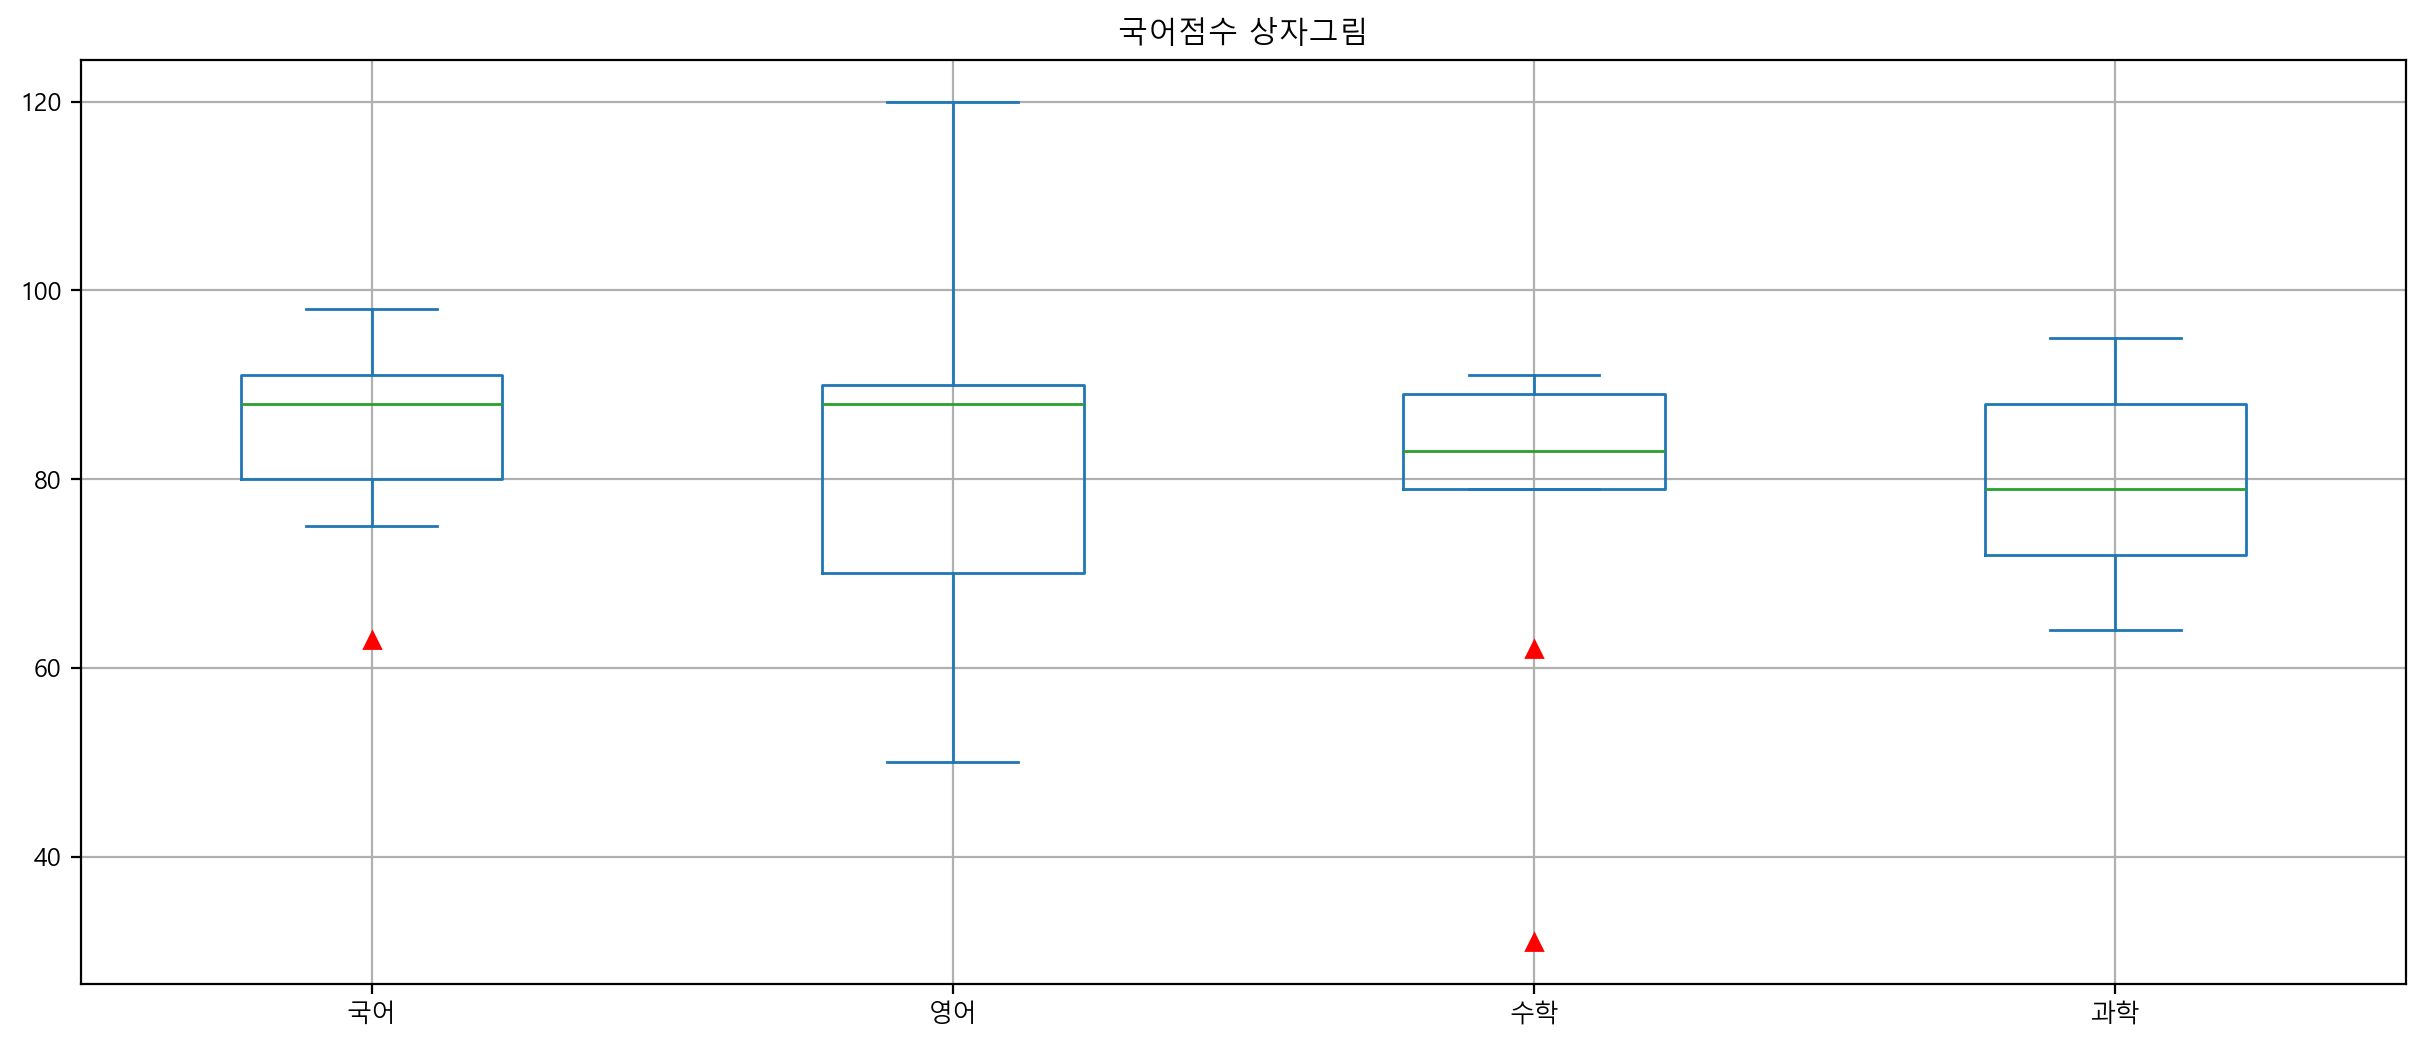

In [9]:
df2.plot(kind = 'box',sym='r^')
plt.grid()
plt.title("국어점수 상자그림")
plt.show()
plt.close()

## #03. Histogram

### [1] 단일 변수에 대한 히스토그램

#### (1) 구간을 자동으로 나누기

데이터 프레임의 특정 변수에 대해 `hist()` 메서드를 호출한다. 파라미터는 `pyplot` 객체의 `hist()` 메서드와 동일하다.

시각화 결과물에 그리드가 자동으로 표시되므로 그리드를 적용하지 않고자 하는 경우 `plt.grid(False)`를 직접 호출해야 한다.

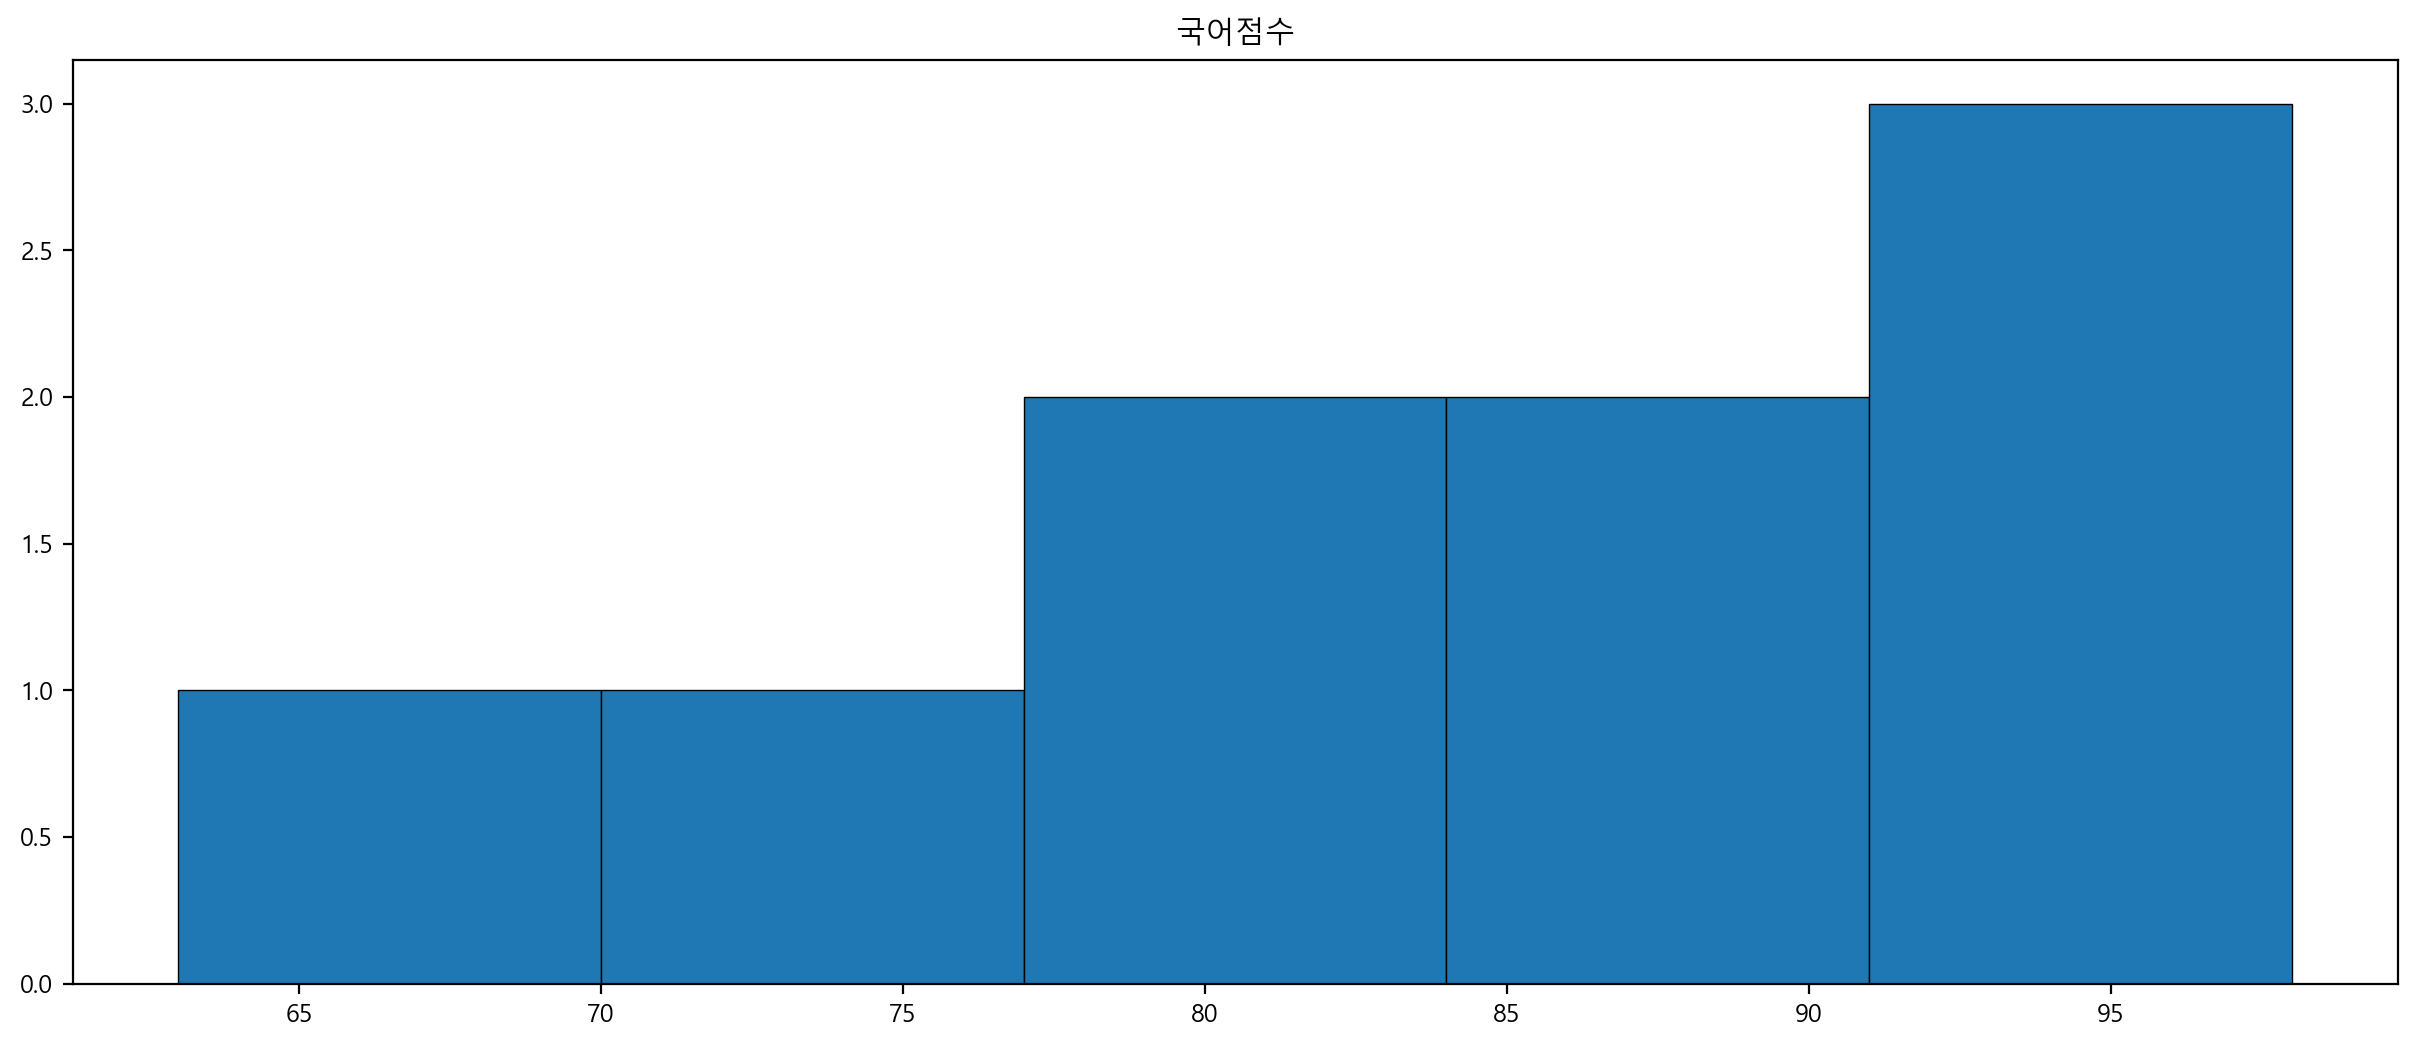

In [10]:
df2['국어'].hist(bins=5, linewidth=0.5, edgecolor="#000000")
plt.grid(False)
plt.title("국어점수")
plt.show()
plt.close()

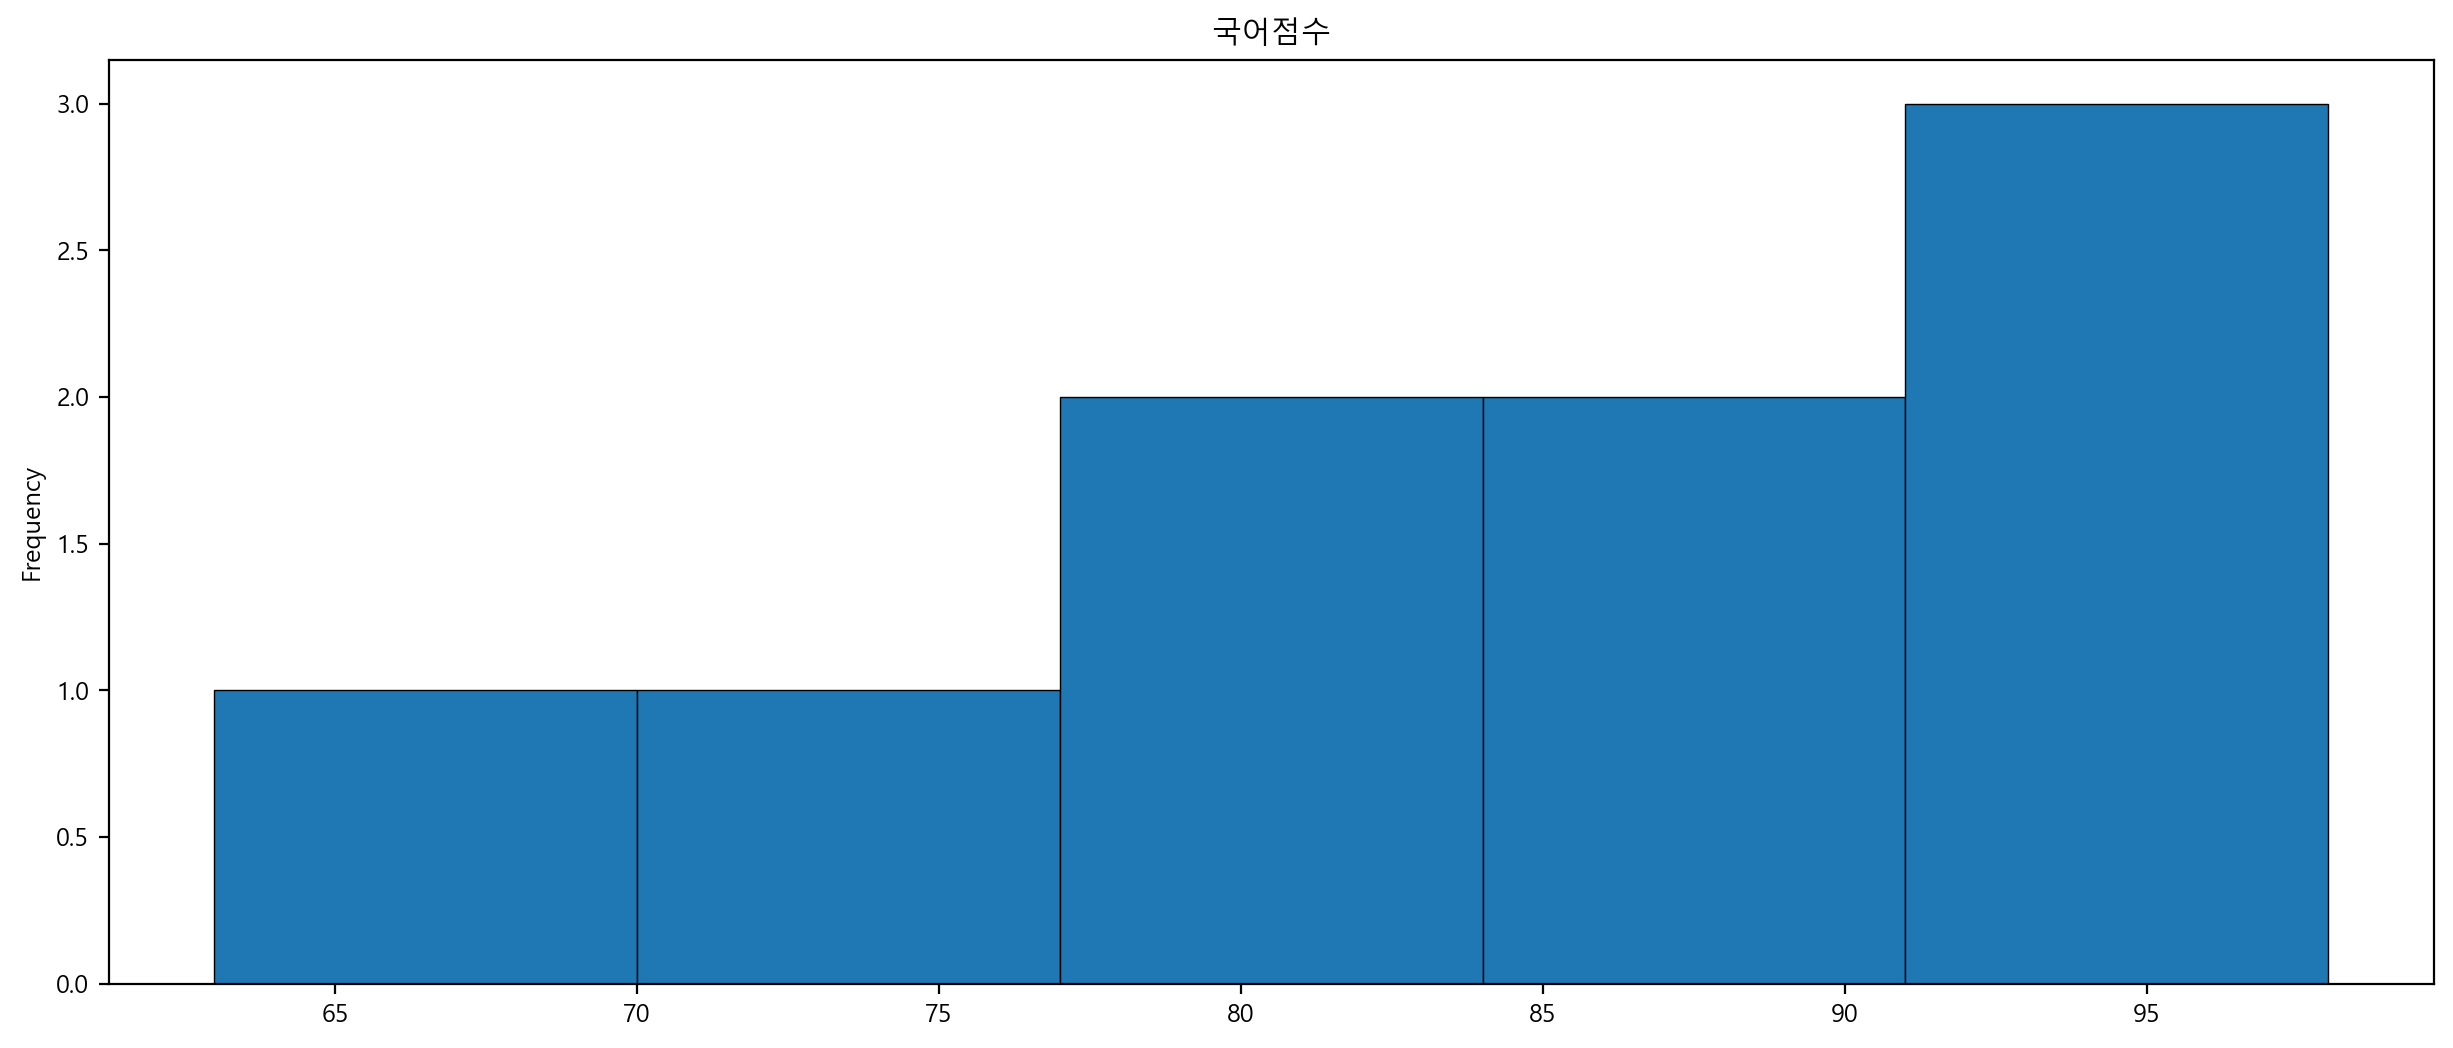

In [11]:
df2['국어'].plot(kind = 'hist', bins=5, linewidth=0.5, edgecolor="#000000")
plt.title("국어점수")
plt.show()
plt.close()

#### (2) 원하는 구간으로 나누기

`bins` 파라미터에 구간을 의미하는 리스트를 설정한다.

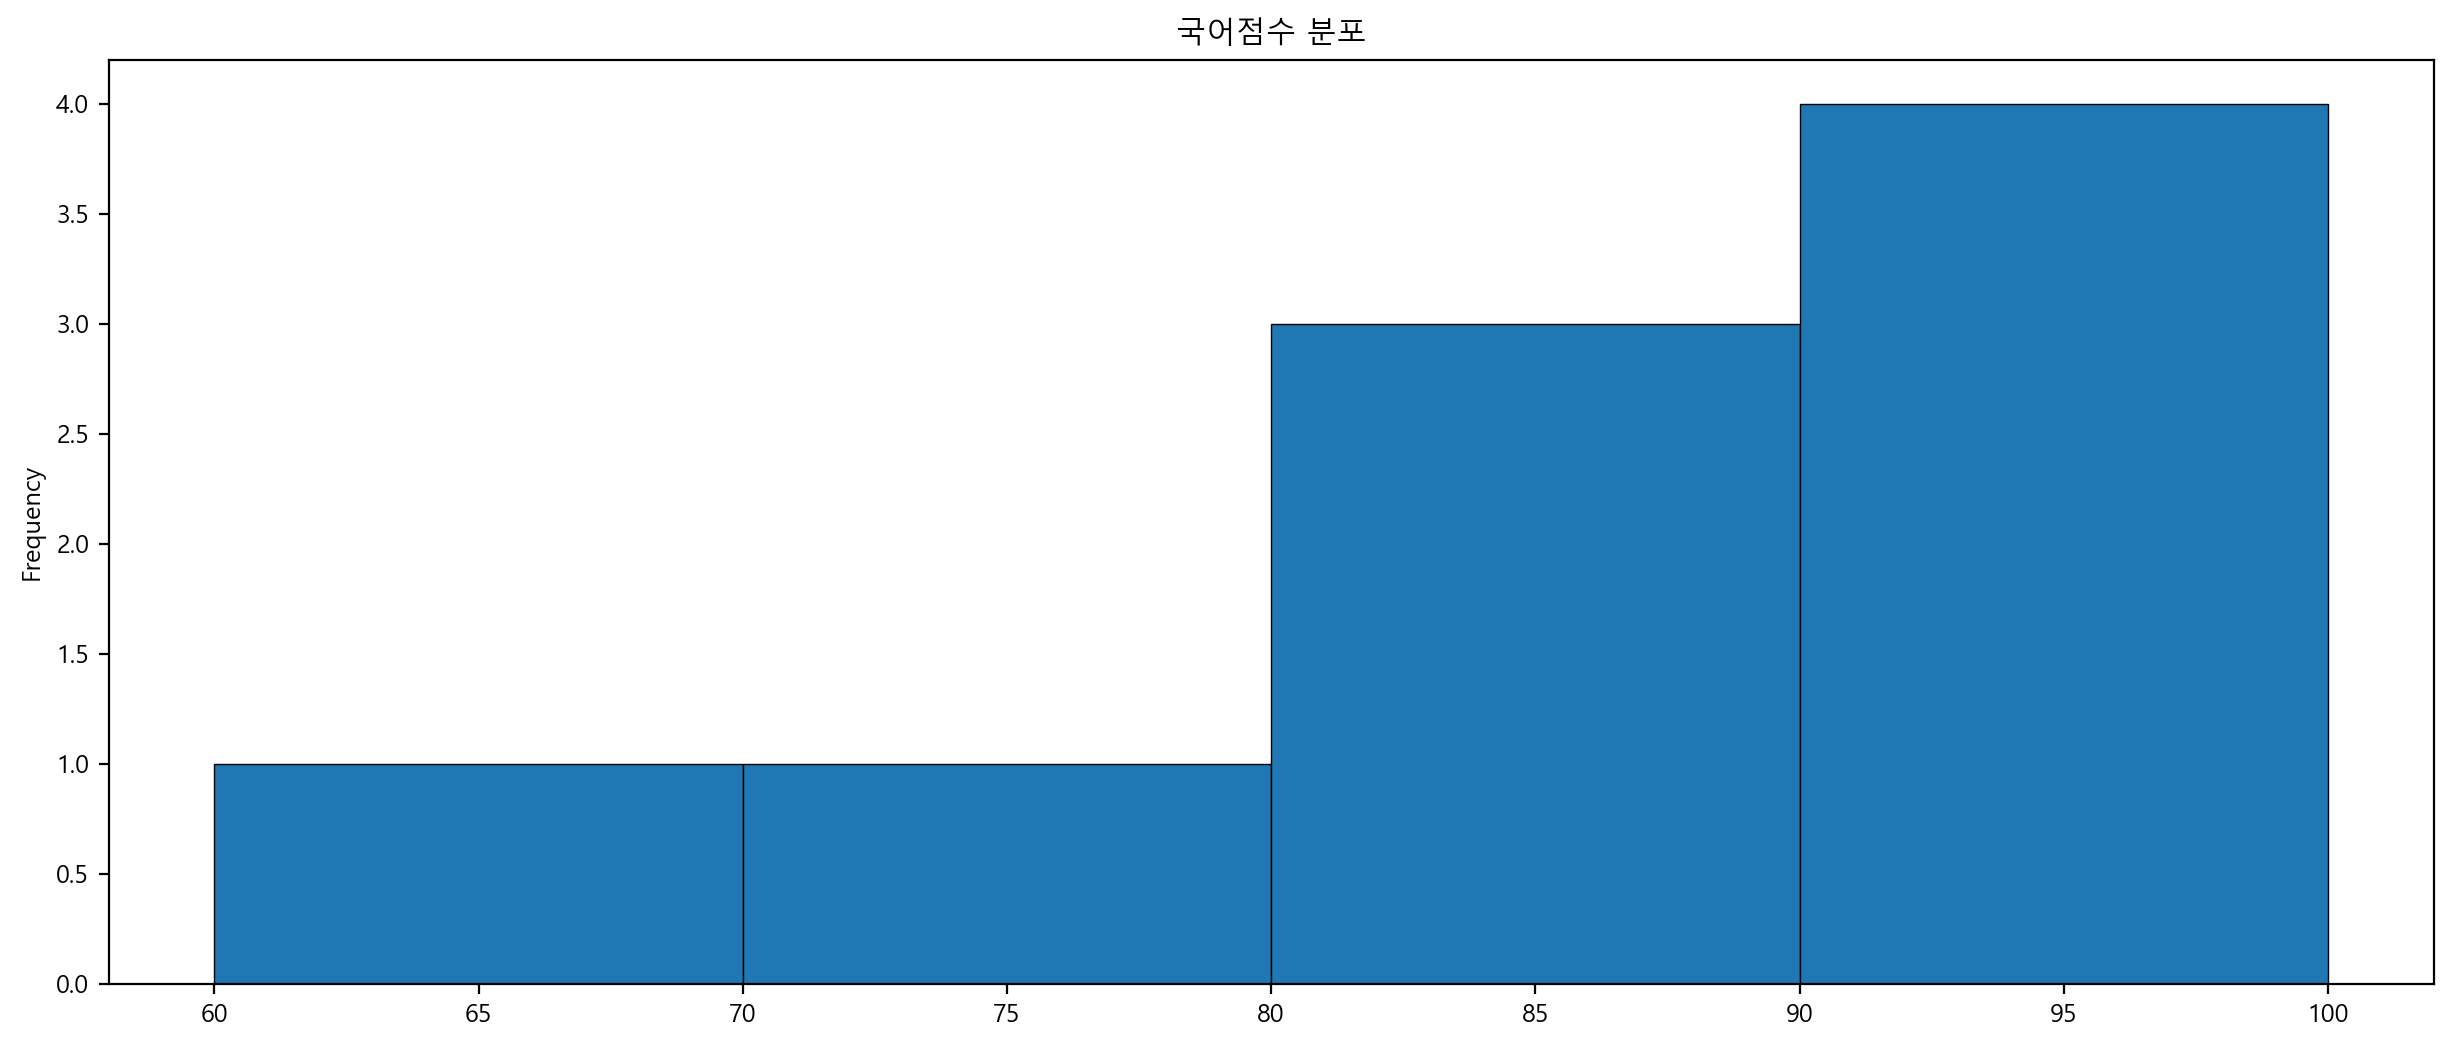

In [12]:
df2['국어'].plot(kind = 'hist', bins=[60,70,80,90,100], linewidth=0.5, edgecolor="#000000")
plt.title("국어점수 분포")
plt.show()
plt.close()

### [2] 복수 변수에 대한 히스토그램

시각화 하려는 변수만 필터링하여 처리한다.

히스토그램의 경우 복수 변수에 대해서 서브플롯으로 처리한다.

> 서브플롯에 대한 내용은 다음 예제에서 상세히 다루게 됩니다.

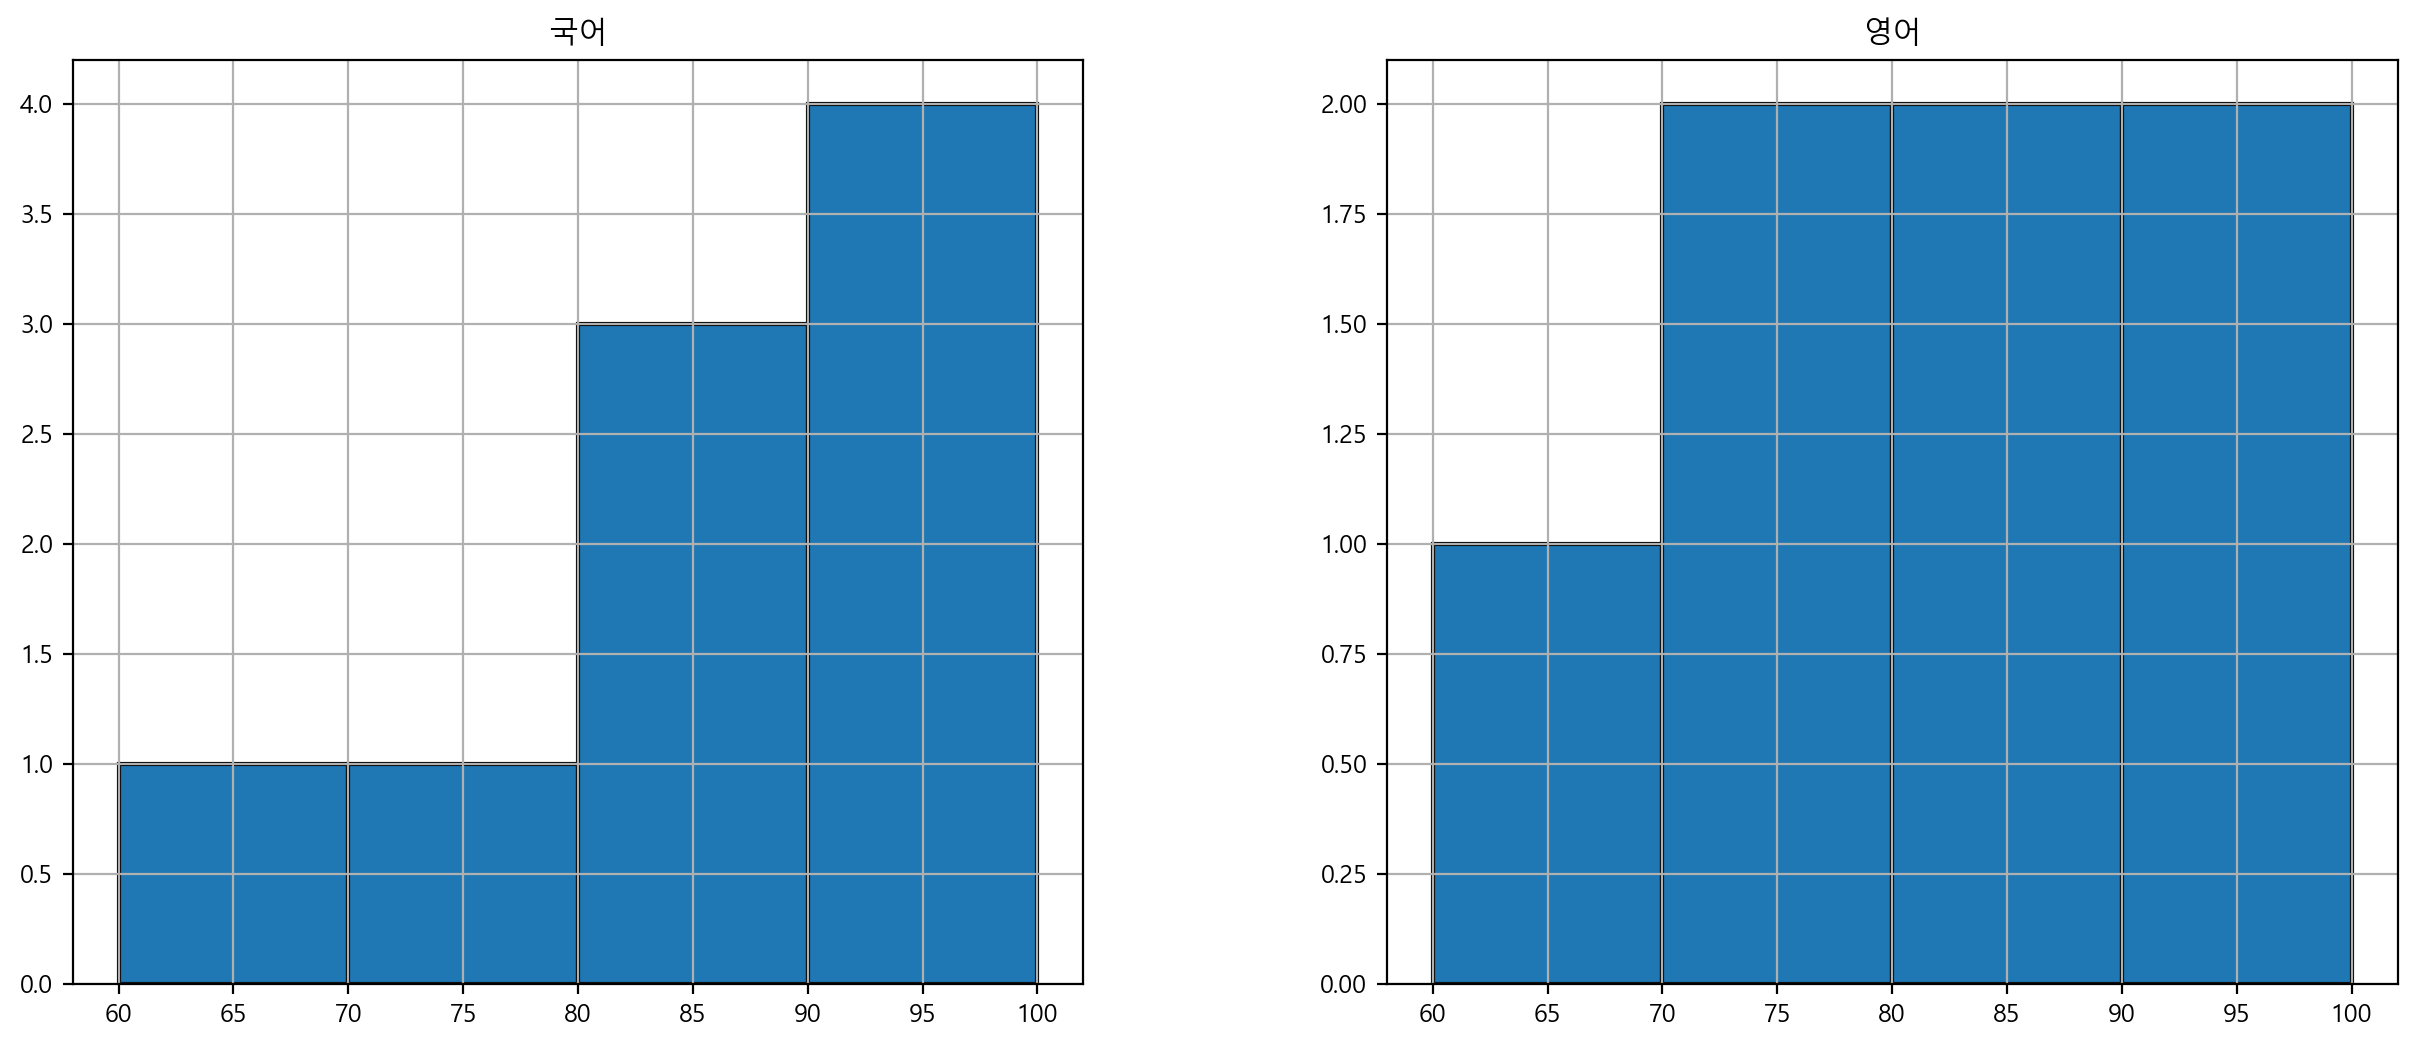

In [13]:
df2[['국어', '영어']].hist(bins=[60,70,80,90,100], linewidth=1.5, edgecolor="#000000")
plt.show()
plt.close()

### [3] 전체 변수에 대한 히스토그램

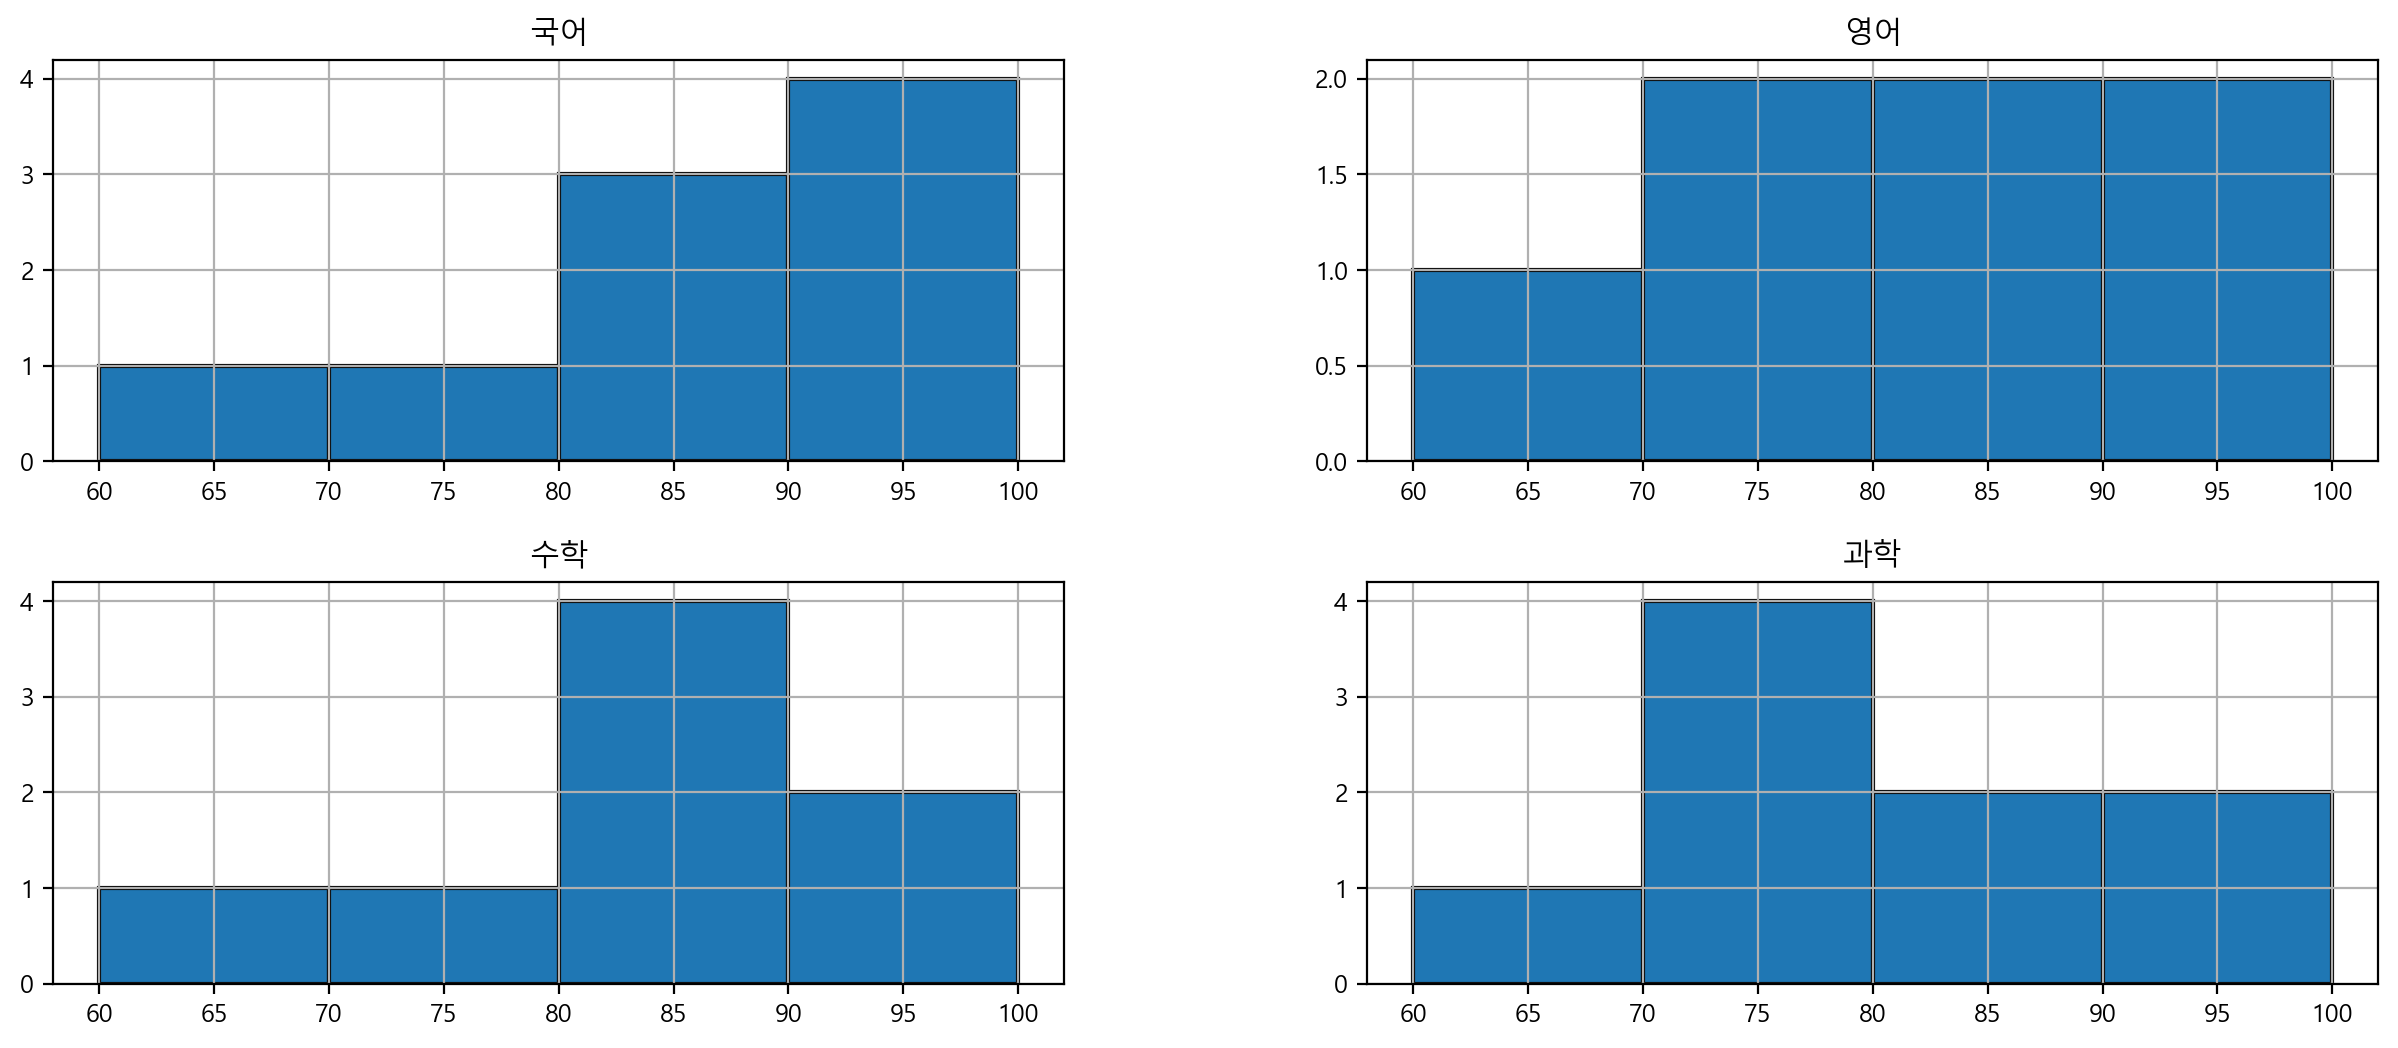

In [14]:
df2.hist(bins=[60,70,80,90,100], linewidth=1.5, edgecolor="#000000")
plt.show()
plt.close()